## Import Libraries


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import Image
%matplotlib inline

### <font style="color:rgb(8,133,37)">Original checkerboard image</font>

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

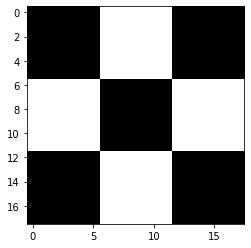

In [2]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png",0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap='gray')
print(cb_img)

## Accessing Individual Pixels


In [3]:
# print the first pixel of the first black box
print(cb_img[0,0])
# print the first white pixel to the right of the first black box
print(cb_img[0,6])

0
255


## <font style="color:black">Modifying Image Pixels</font>


[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

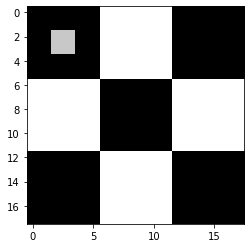

In [4]:
cb_img_copy = cb_img.copy()
cb_img_copy[2,2] = 200
cb_img_copy[2,3] = 200
cb_img_copy[3,2] = 200
cb_img_copy[3,3] = 200

# Same as above
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap='gray')
print(cb_img_copy)

# Cropping Images


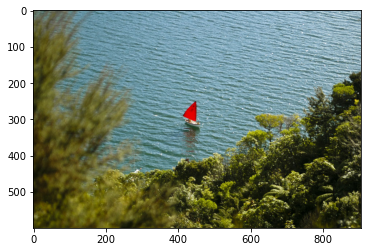

In [5]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg",cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:,:,::-1] 

plt.imshow(img_NZ_rgb)

### <font color="green">Crop out the middle region of the image</font>

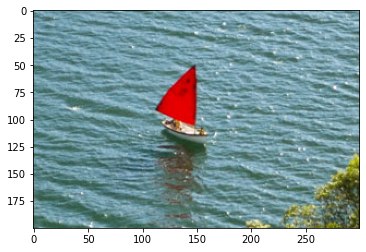

In [6]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

## Resizing Images



### <font color="green"> Method 1: Specifying Scaling Factor using fx and fy


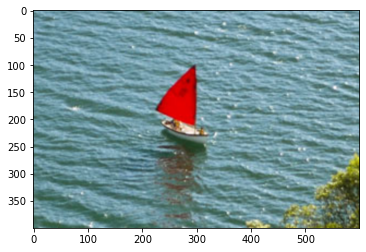

In [7]:
resized_cropped_region_2x = cv2.resize(cropped_region,None,fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

### <font color="green">Medthod 2: Specifying exact size of the output image</font>

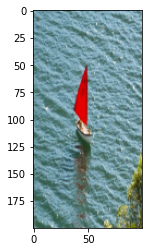

In [8]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### <font color="green">Resize while maintaining aspect ratio</font>

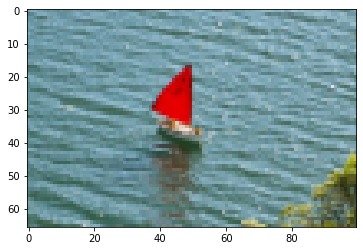

In [9]:
# Method 2: Using 'dsize'
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### <font style="color:rgb(8,133,37)">Let's actually show the (cropped) resized image.</font>

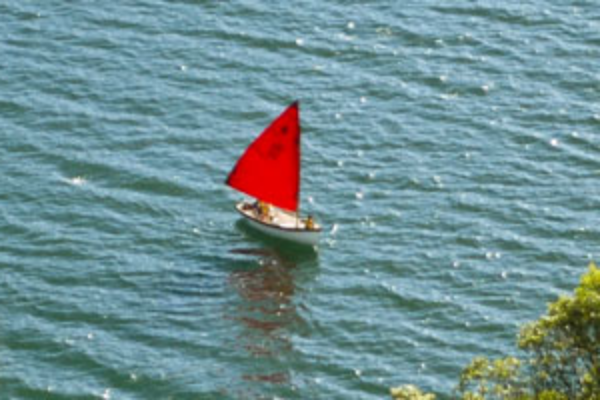

In [10]:
# Swap channel order
resized_cropped_region_2x = resized_cropped_region_2x[:,:,::-1]

# Save resized image to disk
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)

# Display the cropped and resized image
Image(filename='resized_cropped_region_2x.png') 

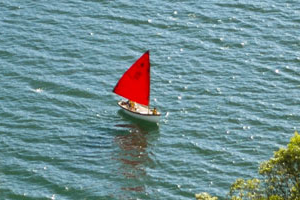

In [11]:
# Swap channel order
cropped_region = cropped_region[:,:,::-1]

# Save cropped 'region'
cv2.imwrite("cropped_region.png", cropped_region)

# Display the cropped and resized image
Image(filename='cropped_region.png') 

## Flipping Images


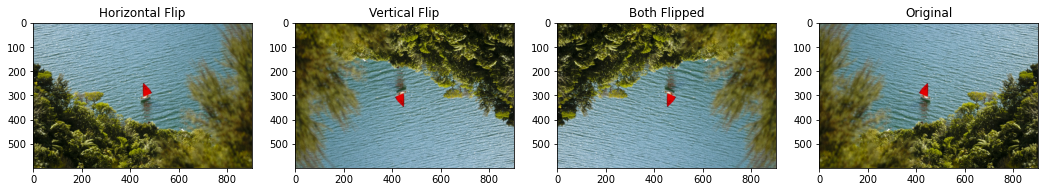

In [12]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");
